In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_file = 'Resources/VacuumTowerData.csv'
data_df = pd.read_csv(data_file)
data_df.head()

C:\Users\JPHeb\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (3,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Batch,Hrs Grp,Hr,B_Charge Tank,Date,Time,Hours,B_EXCHANGE OUTLET,Y_Htr Outlet Temp,B_127 Stream Temp,...,B_HEATER INLET,B_VACmmHg,Actual_VTB,Theoretical_VTB,B_Yield Variance VGO,B_Yield Variance 127,B_Yield Variance 140,B_Yield Variance 152,B_Yield Variance 160,B_Yield Variance VTB
0,1,17,1,79,1/1/2014,9:00:00 AM,17,498.0,738.0,391.0,...,39.0,40.0,0.144335,0.11,-0.021826,-0.001935,0.001662,0.033842,-0.004151,0.034335
1,1,17,2,79,1/1/2014,5:00:00 PM,17,498.0,737.0,390.0,...,39.0,40.0,0.144335,0.11,-0.021826,-0.002616,0.002343,-0.002943,-0.004151,0.034335
2,1,17,3,79,1/1/2014,2:00:00 PM,17,498.0,738.0,391.0,...,39.0,40.0,0.144335,0.11,-0.021126,-0.001672,0.003208,0.034403,-0.004151,0.034335
3,1,17,4,79,1/1/2014,11:00:00 PM,17,498.0,737.0,388.0,...,39.0,40.0,0.144335,0.11,-0.021065,-0.000790,0.006117,0.003986,-0.004151,0.034335
4,1,17,5,79,1/1/2014,8:00:00 AM,17,498.0,736.0,392.0,...,39.0,39.0,0.144335,0.11,-0.021053,-0.000613,0.007392,0.036669,-0.004151,0.034335


In [3]:
# description of index, entries, columns, data types, memory info
data_df.info

<bound method DataFrame.info of        Batch  Hrs Grp  Hr B_Charge Tank       Date         Time  Hours  \
0          1       17   1            79   1/1/2014   9:00:00 AM     17   
1          1       17   2            79   1/1/2014   5:00:00 PM     17   
2          1       17   3            79   1/1/2014   2:00:00 PM     17   
3          1       17   4            79   1/1/2014  11:00:00 PM     17   
4          1       17   5            79   1/1/2014   8:00:00 AM     17   
...      ...      ...  ..           ...        ...          ...    ...   
52726    998       17  13       79 & 41  6/10/2020   3:00:00 PM     17   
52727    998       17  14       79 & 41  6/10/2020   3:00:00 AM     17   
52728    998       17  15       79 & 41  6/10/2020   1:00:00 PM     17   
52729    998       17  16       79 & 41  6/10/2020   4:00:00 PM     17   
52730    998       17  17       79 & 41  6/10/2020   2:00:00 PM     17   

       B_EXCHANGE OUTLET  Y_Htr Outlet Temp  B_127 Stream Temp  ...  \
0       

In [4]:
# number of missing values as a percentage of total observations
data_df.isnull().sum()*100/len(data_df)

Batch                            0.000000
Hrs Grp                          0.000000
Hr                               0.000000
B_Charge Tank                    0.000000
Date                             0.000000
Time                             0.000000
Hours                            0.000000
B_EXCHANGE OUTLET                0.015171
Y_Htr Outlet Temp                0.000000
B_127 Stream Temp                0.000000
B_140 Stream Temp                0.000000
B_152 Stream Temp                0.000000
B_160 Stream Temp                0.001896
Y_Top Tower Temp                 0.003793
B_VAPOR_\nIZER                   0.011379
B_BTM                            0.015171
Y_Reflux Temp                    0.001896
Y_Pump Around Temp               0.001896
B_WASH                           0.030343
Y_127 to Storage Temp            0.005689
Y_140 to Storage Temp            0.007586
Y_152 to Storage Temp            0.005689
Y_160 to Storage Temp            0.005689
Y_VTB to Storage Temp            5

In [5]:
# drop all rows containing null
df = data_df.dropna()
print(df.isnull().values.any())

False


In [6]:
df['Date']= pd.to_datetime(df['Date'])

<ipython-input-6-fb5ecebf89eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']= pd.to_datetime(df['Date'])


In [7]:
df['Y_8TH TUBE'] = df['Y_8TH TUBE'].astype(float)


<ipython-input-7-ed640dec04d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y_8TH TUBE'] = df['Y_8TH TUBE'].astype(float)


In [8]:
data_2020 = df["Date"] >= '1/26/2020'
data_2020

10222    False
10232    False
10235    False
10244    False
10248    False
         ...  
52725     True
52726     True
52727     True
52728     True
52730     True
Name: Date, Length: 4180, dtype: bool

In [9]:
data_2020_df = df[data_2020]
print(data_2020_df.shape)

(3264, 54)


In [10]:
data_2020_df.describe()

,Batch,Hrs Grp,Hr,Hours,B_EXCHANGE OUTLET,Y_Htr Outlet Temp,B_127 Stream Temp,B_140 Stream Temp,B_152 Stream Temp,B_160 Stream Temp,...,B_HEATER INLET,B_VACmmHg,Actual_VTB,Theoretical_VTB,B_Yield Variance VGO,B_Yield Variance 127,B_Yield Variance 140,B_Yield Variance 152,B_Yield Variance 160,B_Yield Variance VTB
count,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,...,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000
mean,952.425245,42.622549,35.750306,42.622549,459.716510,731.521581,420.762987,527.504289,618.348189,645.510849,...,29.235025,32.942215,0.192276,0.116351,-0.010756,-0.003115,-0.002512,-0.014589,-0.041941,0.075925
std,26.198819,15.557797,26.726636,15.557797,9.281747,3.037210,6.927539,6.729719,4.707008,5.933170,...,1.538696,12.288583,0.023868,0.021087,0.007376,0.013457,0.011476,0.017930,0.009635,0.019713
min,910.000000,17.000000,1.000000,17.000000,304.590000,661.700000,254.710000,368.140000,465.320000,520.190000,...,7.880000,13.230000,0.096849,0.039000,-0.036395,-0.125812,-0.291383,-0.203882,-0.062515,0.006980
25%,928.000000,24.000000,15.000000,24.000000,454.547500,729.990000,416.557500,523.362500,616.030000,642.440000,...,28.250000,26.937500,0.182111,0.112000,-0.015661,-0.008279,-0.004781,-0.024136,-0.048007,0.063082
50%,954.000000,48.000000,30.000000,48.000000,458.990000,730.040000,420.800000,528.020000,618.940000,644.735000,...,28.960000,31.870000,0.195257,0.120000,-0.011994,-0.000944,-0.000082,-0.011527,-0.043398,0.075172
75%,974.000000,48.000000,50.000000,48.000000,465.680000,734.870000,425.190000,531.520000,620.450000,647.720000,...,30.050000,36.350000,0.207222,0.130000,-0.004646,0.000155,0.001329,-0.000417,-0.037090,0.087553
max,998.000000,72.000000,144.000000,72.000000,483.110000,740.260000,439.980000,546.550000,628.760000,662.590000,...,32.820000,475.350000,0.340455,0.149000,0.015439,0.039703,0.041709,0.028539,0.149442,0.199455


In [11]:
# Keep on Y_value Columns
y_var_df = data_2020_df[['Y_Htr Outlet Temp', 'Y_Top Tower Temp', 'Y_Reflux Temp', 'Y_Pump Around Temp', 
       'Y_127 to Storage Temp', 'Y_140 to Storage Temp','Y_152 to Storage Temp', 'Y_160 to Storage Temp',
       'Y_VTB to Storage Temp', 'Y_127 Strip Lvl Pcnt', 'Y_140 Strip Lvl Pcnt', 'Y_152 Strip Lvl Pcnt',
       'Y_160 Strip Lvl Pcnt', 'Y_Vacuum Charge Flow', 'Y_REFLUX', 'Y_PUMP AROUND', 'Y_Wash Flow', 'Y_127 to Storage Flow',
       'Y_140 to Storage Flow', 'Y_152 to Storage Flow', 'Y_160 to Storage Flow', 'Y_8TH TUBE', 'Y_Stripping Steam Tower Flow',
       'Y_127 Stripping Stream Flow', 'Y_140 Stripping Stream Flow', 'Y_152 Stripping Stream Flow', 'Y_160 Stripping Stream Flow',
       'B_Yield Variance VTB']]

In [12]:
y_var_df.head()

,Y_Htr Outlet Temp,Y_Top Tower Temp,Y_Reflux Temp,Y_Pump Around Temp,Y_127 to Storage Temp,Y_140 to Storage Temp,Y_152 to Storage Temp,Y_160 to Storage Temp,Y_VTB to Storage Temp,Y_127 Strip Lvl Pcnt,...,Y_140 to Storage Flow,Y_152 to Storage Flow,Y_160 to Storage Flow,Y_8TH TUBE,Y_Stripping Steam Tower Flow,Y_127 Stripping Stream Flow,Y_140 Stripping Stream Flow,Y_152 Stripping Stream Flow,Y_160 Stripping Stream Flow,B_Yield Variance VTB
49466,739.97,269.64,150.03,190.14,222.71,234.88,199.40,208.55,234.79,64.97,...,58.50,28.99,5.28,455.63,426.87,249.04,-8.72,141.61,-9.18,0.099931
49467,740.01,268.81,149.82,190.14,223.29,236.09,200.64,209.25,233.37,65.03,...,58.51,27.98,6.40,457.02,416.80,252.25,0.07,141.60,0.20,0.094223
49468,740.02,270.69,150.01,190.38,222.86,235.36,199.70,210.44,232.76,64.99,...,58.50,29.01,5.31,455.94,437.62,251.25,-8.73,141.60,0.26,0.085395
49469,740.02,269.04,149.93,189.63,223.03,235.16,199.37,210.17,233.26,65.01,...,58.52,29.00,5.23,455.85,436.80,250.88,-8.72,141.59,0.31,0.091764
49470,739.99,270.02,150.08,190.25,223.52,236.07,201.36,209.00,235.91,64.98,...,58.50,28.34,5.96,456.51,416.23,251.50,-8.69,141.60,0.26,0.086243


In [13]:
y_var_df['B_Yield Variance VTB'].describe()

count    3264.000000
mean        0.075925
std         0.019713
min         0.006980
25%         0.063082
50%         0.075172
75%         0.087553
max         0.199455
Name: B_Yield Variance VTB, dtype: float64

In [95]:
y_varaibles_describe = y_var_df.describe()
y_varaibles_describe =  y_varaibles_describe[1:3]

print(y_varaibles_describe) 
#print(test2.str)
#print(test2.iloc[1,0])
print(y_varaibles_describe.loc["std","Y_Htr Outlet Temp"])
#y_varaibles_describe
#y_variance_export()
y_varaibles_describe.to_csv('Resources/y_varaibles_describe.csv',index=False)

      Y_Htr Outlet Temp  Y_Top Tower Temp  Y_Reflux Temp  Y_Pump Around Temp  \
mean         731.521581        256.819994     150.014709          183.524458   
std            3.037210          5.860524       0.740130            2.732432   

      Y_127 to Storage Temp  Y_140 to Storage Temp  Y_152 to Storage Temp  \
mean             213.231088             230.823621             199.995843   
std               17.302324              19.185515               1.941896   

      Y_160 to Storage Temp  Y_VTB to Storage Temp  Y_127 Strip Lvl Pcnt  \
mean             197.095999             234.005184             64.567353   
std               16.314678               6.810913              2.784441   

      Y_140 Strip Lvl Pcnt  Y_152 Strip Lvl Pcnt  Y_160 Strip Lvl Pcnt  \
mean             50.002494             50.019449             63.075334   
std               1.003332              1.153270              7.040076   

      Y_Vacuum Charge Flow   Y_REFLUX  Y_PUMP AROUND  Y_Wash Flow  \
mean  

In [14]:
bins = [0, 0.059718, 0.072285, 0.084499, 0.199455]

In [15]:
# Create the names for the five bins
group_names = ["Best", "Better", "Acceptable", "Not Acceptable"]

In [16]:
y_var_df["VTB Results"] = pd.cut(df['B_Yield Variance VTB'], bins, labels=group_names, include_lowest=True)
y_var_df.head()

<ipython-input-16-1b34461237c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_var_df["VTB Results"] = pd.cut(df['B_Yield Variance VTB'], bins, labels=group_names, include_lowest=True)


,Y_Htr Outlet Temp,Y_Top Tower Temp,Y_Reflux Temp,Y_Pump Around Temp,Y_127 to Storage Temp,Y_140 to Storage Temp,Y_152 to Storage Temp,Y_160 to Storage Temp,Y_VTB to Storage Temp,Y_127 Strip Lvl Pcnt,...,Y_152 to Storage Flow,Y_160 to Storage Flow,Y_8TH TUBE,Y_Stripping Steam Tower Flow,Y_127 Stripping Stream Flow,Y_140 Stripping Stream Flow,Y_152 Stripping Stream Flow,Y_160 Stripping Stream Flow,B_Yield Variance VTB,VTB Results
49466,739.97,269.64,150.03,190.14,222.71,234.88,199.40,208.55,234.79,64.97,...,28.99,5.28,455.63,426.87,249.04,-8.72,141.61,-9.18,0.099931,Not Acceptable
49467,740.01,268.81,149.82,190.14,223.29,236.09,200.64,209.25,233.37,65.03,...,27.98,6.40,457.02,416.80,252.25,0.07,141.60,0.20,0.094223,Not Acceptable
49468,740.02,270.69,150.01,190.38,222.86,235.36,199.70,210.44,232.76,64.99,...,29.01,5.31,455.94,437.62,251.25,-8.73,141.60,0.26,0.085395,Not Acceptable
49469,740.02,269.04,149.93,189.63,223.03,235.16,199.37,210.17,233.26,65.01,...,29.00,5.23,455.85,436.80,250.88,-8.72,141.59,0.31,0.091764,Not Acceptable
49470,739.99,270.02,150.08,190.25,223.52,236.07,201.36,209.00,235.91,64.98,...,28.34,5.96,456.51,416.23,251.50,-8.69,141.60,0.26,0.086243,Not Acceptable


In [17]:
best_data = y_var_df[y_var_df["VTB Results"] == 'Best']
best_data.head()

,Y_Htr Outlet Temp,Y_Top Tower Temp,Y_Reflux Temp,Y_Pump Around Temp,Y_127 to Storage Temp,Y_140 to Storage Temp,Y_152 to Storage Temp,Y_160 to Storage Temp,Y_VTB to Storage Temp,Y_127 Strip Lvl Pcnt,...,Y_152 to Storage Flow,Y_160 to Storage Flow,Y_8TH TUBE,Y_Stripping Steam Tower Flow,Y_127 Stripping Stream Flow,Y_140 Stripping Stream Flow,Y_152 Stripping Stream Flow,Y_160 Stripping Stream Flow,B_Yield Variance VTB,VTB Results
49514,740.05,269.09,150.02,190.35,224.04,222.94,199.07,203.97,240.25,64.97,...,29.99,5.99,453.64,395.68,249.81,0.04,141.59,-6.60,0.057626,Best
49516,739.99,269.57,150.18,189.92,221.25,222.44,199.15,210.52,240.31,64.97,...,30.01,5.37,456.40,391.97,251.54,0.04,141.60,-9.07,0.050975,Best
49526,740.03,271.04,150.04,189.52,222.07,223.56,198.98,208.07,240.08,65.02,...,30.00,5.44,454.93,394.22,251.69,0.03,141.60,-3.95,0.051751,Best
49562,739.82,245.11,149.98,190.23,218.47,215.60,200.79,205.57,243.27,64.96,...,32.01,4.98,452.13,383.54,251.31,-4.88,141.60,-9.18,0.049492,Best
49565,739.99,244.58,150.06,189.75,221.44,217.50,201.69,207.88,243.47,65.02,...,31.98,4.74,450.61,382.83,251.38,-8.67,141.60,-9.02,0.055565,Best


In [18]:
pd.set_option('display.max_columns', None)
best_data.describe()

,Y_Htr Outlet Temp,Y_Top Tower Temp,Y_Reflux Temp,Y_Pump Around Temp,Y_127 to Storage Temp,Y_140 to Storage Temp,Y_152 to Storage Temp,Y_160 to Storage Temp,Y_VTB to Storage Temp,Y_127 Strip Lvl Pcnt,Y_140 Strip Lvl Pcnt,Y_152 Strip Lvl Pcnt,Y_160 Strip Lvl Pcnt,Y_Vacuum Charge Flow,Y_REFLUX,Y_PUMP AROUND,Y_Wash Flow,Y_127 to Storage Flow,Y_140 to Storage Flow,Y_152 to Storage Flow,Y_160 to Storage Flow,Y_8TH TUBE,Y_Stripping Steam Tower Flow,Y_127 Stripping Stream Flow,Y_140 Stripping Stream Flow,Y_152 Stripping Stream Flow,Y_160 Stripping Stream Flow,B_Yield Variance VTB
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,731.022033,258.046943,150.002569,182.446049,209.503398,227.032520,200.028309,193.373220,235.057740,64.815675,49.999854,50.005252,63.223805,138.585821,35.080049,57.025415,3.867772,26.547691,51.351496,30.158358,2.147707,456.455350,563.398374,236.377431,27.372098,138.585821,-0.628033,0.049032
std,2.320612,4.300249,0.129397,2.818279,16.247064,15.734074,1.571367,14.918037,5.221583,1.565423,0.033646,0.133327,6.530495,4.335146,4.513527,3.728457,1.822215,3.326311,2.523512,2.100616,0.991464,5.624765,39.297132,6.348872,56.011912,4.335146,23.450798,0.009161
min,727.920000,244.150000,149.280000,178.360000,165.850000,181.970000,192.940000,174.030000,217.580000,45.460000,49.370000,49.460000,11.720000,97.010000,24.280000,38.090000,1.480000,17.610000,34.010000,18.250000,0.310000,440.280000,364.010000,225.530000,-8.870000,97.010000,-9.270000,0.006980
25%,729.980000,255.045000,149.920000,179.990000,207.065000,220.645000,199.030000,184.260000,234.195000,64.970000,49.990000,49.990000,64.870000,133.300000,32.035000,54.020000,3.110000,23.890000,49.800000,29.500000,1.620000,452.195000,550.475000,232.270000,0.040000,133.300000,-9.110000,0.044879
50%,730.030000,259.290000,150.000000,180.400000,213.220000,228.180000,199.870000,188.490000,236.220000,65.000000,50.000000,50.000000,64.980000,141.600000,34.700000,57.960000,3.240000,27.690000,50.990000,30.980000,1.980000,456.430000,565.640000,234.540000,0.090000,141.600000,-6.600000,0.051175
75%,730.090000,260.195000,150.080000,185.015000,219.450000,237.935000,201.100000,197.780000,237.485000,65.030000,50.010000,50.020000,65.010000,141.600000,36.940000,59.900000,3.900000,29.200000,53.750000,31.495000,2.410000,459.755000,583.135000,237.820000,0.645000,141.600000,0.240000,0.056150
max,740.070000,271.040000,150.450000,191.050000,239.200000,273.130000,204.570000,260.900000,302.560000,69.280000,50.270000,53.120000,65.270000,141.650000,48.070000,63.120000,13.710000,35.980000,58.000000,33.720000,9.790000,472.380000,652.460000,259.210000,238.440000,141.650000,178.000000,0.059716


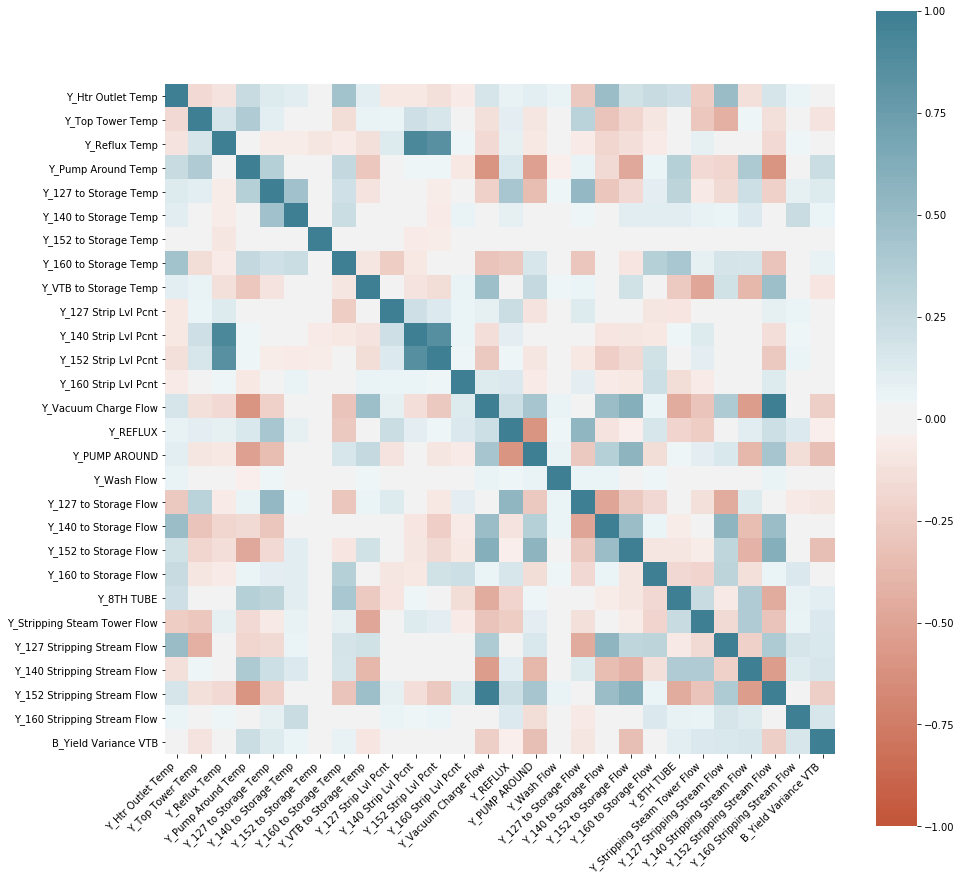

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
corr = y_var_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [20]:
# Labels are the values we want to predict
target = np.array(y_var_df['B_Yield Variance VTB'])

# Remove the labels from the features
# axis 1 refers to the columns
data = y_var_df.drop(['B_Yield Variance VTB','VTB Results'], axis = 1)

# Saving feature names for later use
feature_list = list(data.columns)

# Convert to numpy array
data = np.array(data)

In [21]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 42)

In [22]:
print('Training Data Shape:', X_train.shape)
print('Training Target Shape:', y_train.shape)
print('Testing Data Shape:', X_test.shape)
print('Testing Target Shape:', y_test.shape)

Training Data Shape: (2448, 27)
Training Target Shape: (2448,)
Testing Data Shape: (816, 27)
Testing Target Shape: (816,)


In [23]:
# The baseline predictions are the historical averages
baseline_preds =  X_test[:, feature_list.index('Y_160 to Storage Flow')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_test)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  2.26


In [24]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(X_train, y_train);

In [25]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [26]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.01


In [27]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%.')

Accuracy: 86.89 %.


In [28]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Y_PUMP AROUND        Importance: 0.14
Variable: Y_152 to Storage Flow Importance: 0.13
Variable: Y_127 Stripping Stream Flow Importance: 0.11
Variable: Y_REFLUX             Importance: 0.1
Variable: Y_VTB to Storage Temp Importance: 0.05
Variable: Y_127 to Storage Flow Importance: 0.05
Variable: Y_127 to Storage Temp Importance: 0.04
Variable: Y_140 to Storage Temp Importance: 0.04
Variable: Y_160 to Storage Flow Importance: 0.04
Variable: Y_Stripping Steam Tower Flow Importance: 0.04
Variable: Y_160 Stripping Stream Flow Importance: 0.04
Variable: Y_160 to Storage Temp Importance: 0.03
Variable: Y_140 to Storage Flow Importance: 0.03
Variable: Y_8TH TUBE           Importance: 0.03
Variable: Y_Htr Outlet Temp    Importance: 0.02
Variable: Y_Top Tower Temp     Importance: 0.02
Variable: Y_Pump Around Temp   Importance: 0.02
Variable: Y_Wash Flow          Importance: 0.02
Variable: Y_140 Stripping Stream Flow Importance: 0.02
Variable: Y_Reflux Temp        Importance: 0.01
Vari

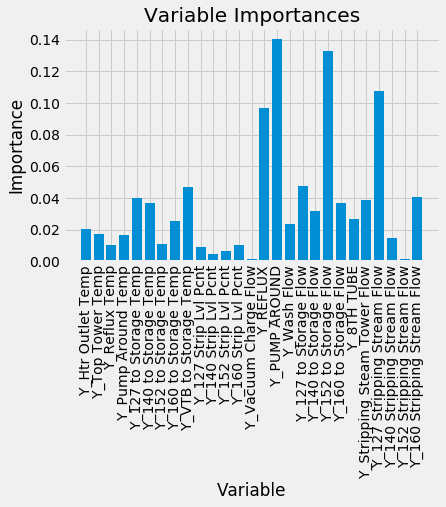

In [29]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [32]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, Lars, OrthogonalMatchingPursuit, BayesianRidge, ARDRegression, SGDRegressor, PassiveAggressiveRegressor, RANSACRegressor, TheilSenRegressor, HuberRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn import svm

models = [
    linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.Lasso(),
    linear_model.ElasticNet(),
    linear_model.Lars(),
    linear_model.OrthogonalMatchingPursuit(),
    linear_model.BayesianRidge(),
    linear_model.ARDRegression(),
    linear_model.SGDRegressor(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.RANSACRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.HuberRegressor(),
    MLPRegressor(),
    KNeighborsRegressor(),
    RadiusNeighborsRegressor(),
    svm.SVR()]

for item in models:
    print(item)
    model = item
    model.fit(X_train, y_train)
    print(f'Predicted:{model.predict(X_train)}')
    
    # Use the forest's predict method on the test data
    predictions = model.predict(X_test)

    # Calculate the absolute errors
    errors = abs(predictions - y_test)
    
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)

    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2),'%. \n')
    
    


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Predicted:[0.06402798 0.06933901 0.05962518 ... 0.08395106 0.05352472 0.0768138 ]
Mean Absolute Error: 0.01
Accuracy: 81.83 %. 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Predicted:[0.06408291 0.06933892 0.05965146 ... 0.08393547 0.05348653 0.076799  ]
Mean Absolute Error: 0.01
Accuracy: 81.84 %. 

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Predicted:[0.07573696 0.07573696 0.07573696 ... 0.07573696 0.07573696 0.07573696]
Mean Absolute Error: 0.02
Accuracy: 76.71 %. 

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0

C:\Users\JPHeb\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Predicted:[0.04234685 0.06262459 0.04428168 ... 0.10140065 0.05215512 0.07452686]
Mean Absolute Error: 0.02
Accuracy: 78.41 %. 

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
Predicted:[-0.05030795 -0.78488091 -1.1248765  ... -0.30259068  0.05400342
 -0.18550712]
Mean Absolute Error: 0.38
Accuracy: -397.85 %. 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
Predicted:[0.06513004 0.0826717

C:\Users\JPHeb\Anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
cross_val_score(regressor, X_train, y_train, cv=100)

# Use the forest's predict method on the test data
predictions = regressor.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)
    
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
    
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%. \n')

Mean Absolute Error: 0.01
Accuracy: 81.77 %. 



In [47]:
from statsmodels.api import OLS
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              2329.
Date:                Wed, 26 Aug 2020   Prob (F-statistic):                        0.00
Time:                        19:05:13   Log-Likelihood:                          6796.1
No. Observations:                2448   AIC:                                 -1.354e+04
Df Residuals:                    2421   BIC:                                 -1.338e+04
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [49]:
test_df = y_var_df.drop(['B_Yield Variance VTB','VTB Results'], axis = 1)

In [50]:
#convert it to numpy arrays
X=test_df.values

In [51]:
#Scaling the values
X = scale(X)

In [52]:
pca = PCA(n_components=27)

In [53]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=27, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [54]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
var

array([1.94329567e-01, 1.14025218e-01, 1.05802266e-01, 9.14709004e-02,
       6.06854706e-02, 5.65529723e-02, 4.97849720e-02, 3.95784987e-02,
       3.68116521e-02, 3.53513180e-02, 3.29045058e-02, 3.02241633e-02,
       2.68150535e-02, 2.25083847e-02, 1.93034874e-02, 1.67279372e-02,
       1.30166485e-02, 1.14012385e-02, 8.84145601e-03, 8.62424382e-03,
       7.93510313e-03, 6.20447084e-03, 4.95149213e-03, 2.64536072e-03,
       2.02155389e-03, 1.48206502e-03, 1.68036355e-10])

In [55]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=2)*100)
print(var1)

[ 19.  30.  41.  50.  56.  62.  67.  71.  75.  79.  82.  85.  88.  90.
  92.  94.  95.  96.  97.  98.  99. 100. 100. 100. 100. 100. 100.]


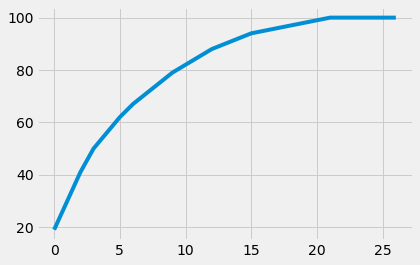

In [43]:
plt.plot(var1)

In [44]:
#Looking at above plot I'm taking 28 variables
pca = PCA(n_components=22)
pca.fit(X)
X1=pca.fit_transform(X)

print(X1)

[[-1.53314485 -0.29761409 -1.49656572 ... -0.03648114  0.27382698
   0.32206254]
 [-1.38771372 -0.48531636 -1.8583548  ...  0.06010105  0.27674017
   0.25357364]
 [-1.40145622 -0.38376037 -1.56888669 ... -0.02512456  0.07790399
   0.31327586]
 ...
 [ 2.07052638 -2.16262359  0.07982895 ... -1.00166109 -0.3320898
   0.37217688]
 [ 2.15276152 -2.79883317 -0.63040743 ... -0.63239399 -0.12877632
   0.29434881]
 [ 2.30998725 -2.64933711 -0.37734599 ... -0.63214931 -0.24861008
   0.44723166]]
